# Split data 7-3

In [77]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../SGT.csv')
data

,time,open,high,low,close,volume
0,3/1/2019,3980,3980,3960,3960,20
1,3/4/2019,3680,3960,3680,3720,400
2,3/5/2019,3930,3930,3930,3930,10
3,3/6/2019,3930,3930,3930,3930,150
4,3/7/2019,3790,3860,3790,3860,110
...,...,...,...,...,...,...
1317,6/7/2024,14800,14900,14600,14800,78100
1318,6/10/2024,14850,14850,14600,14600,39600
1319,6/11/2024,14550,14550,14000,14050,126200
1320,6/12/2024,14000,14200,13700,14200,83400


In [78]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [79]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 7:3
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training and testing sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [80]:
pip install pmdarima

In [81]:
df

,close
time,
2019-03-01,3960
2019-03-04,3720
2019-03-05,3930
2019-03-06,3930
2019-03-07,3860
...,...
2024-06-07,14800
2024-06-10,14600
2024-06-11,14050


In [82]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13785.467, Time=3.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13810.885, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13786.937, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13787.320, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13809.115, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13787.770, Time=1.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13786.946, Time=2.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13789.965, Time=2.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13786.373, Time=2.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13788.749, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13784.958, Time=3.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13782.978, Time=0.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13788.167, Time=0.55 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=13785.003, Time=0.83 sec
 ARIMA(1,1,4)(0,0,0

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [83]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [84]:
import datetime

In [85]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
last_data = pd.Index(next_30_days)

# Predict the closing prices for the next 30 days

y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[10037.11126052 10053.26716974 10121.80986005 10121.80986005
 10121.80986005 10121.80986005 10121.80986005 10121.80986005
 10121.80986005 10121.80986005 10121.80986005 10121.80986005
 10121.80986005 10121.80986005 10121.80986005 10121.80986005
 10121.80986005 10121.80986005 10121.80986005 10121.80986005
 10121.80986005 10121.80986005 10121.80986005 10121.80986005
 10121.80986005 10121.80986005 10121.80986005 10121.80986005
 10121.80986005 10121.80986005]


In [86]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 2848.1749927393826


Testing RMSE: 2848.1749927393826


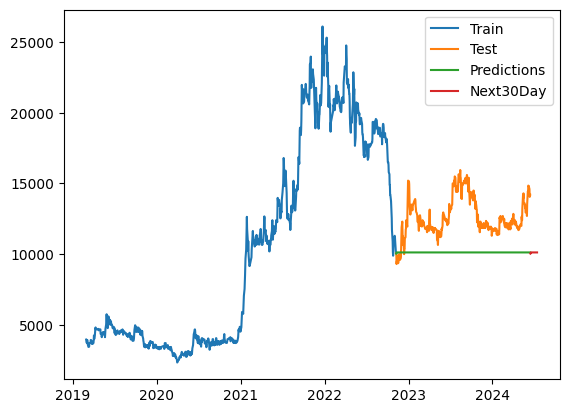

In [87]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [88]:
test_data.index

DatetimeIndex(['2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
               '2022-11-18', '2022-11-21',
               ...
               '2024-05-31', '2024-06-03', '2024-06-04', '2024-06-05',
               '2024-06-06', '2024-06-07', '2024-06-10', '2024-06-11',
               '2024-06-12', '2024-06-13'],
              dtype='datetime64[ns]', name='time', length=397, freq=None)

In [89]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 2848.1749927393826
Testing MAPE: 19.265296581872406
Testing MDA: 10.353535353535353
Testing MSLE: 0.0577725618704802


# Split data 8:2

In [90]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../SGT.csv')
data

,time,open,high,low,close,volume
0,3/1/2019,3980,3980,3960,3960,20
1,3/4/2019,3680,3960,3680,3720,400
2,3/5/2019,3930,3930,3930,3930,10
3,3/6/2019,3930,3930,3930,3930,150
4,3/7/2019,3790,3860,3790,3860,110
...,...,...,...,...,...,...
1317,6/7/2024,14800,14900,14600,14800,78100
1318,6/10/2024,14850,14850,14600,14600,39600
1319,6/11/2024,14550,14550,14000,14050,126200
1320,6/12/2024,14000,14200,13700,14200,83400


In [91]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [92]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 7:1.5:1
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
# Split the data into training and testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [93]:
!pip install pmdarima

In [94]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15725.232, Time=2.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15756.098, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15729.532, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15730.245, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15754.384, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15729.398, Time=1.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15728.561, Time=3.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15732.727, Time=2.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15727.274, Time=5.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15731.431, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15726.309, Time=1.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15725.990, Time=2.14 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=15729.024, Time=4.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=15723.580, Time=1.44 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [95]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [96]:
import datetime

In [97]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
last_data = pd.Index(next_30_days)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[11260.4646872  11266.0010044  11266.50190409 11264.07565749
 11261.1166919  11259.14360485 11258.55013414 11258.95489294
 11259.72312014 11260.35664076 11260.64511813 11260.62369683
 11260.44460189 11260.25763133 11260.14684249 11260.12473368
 11260.15989095 11260.21076493 11260.24821994 11260.26233775
 11260.25781533 11260.24519996 11260.2336527  11260.22764753
 11260.22720996 11260.22995888 11260.23324139 11260.23539933
 11260.23602344 11260.23555311]


In [98]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 2161.100784481141


Testing RMSE: 2161.100784481141


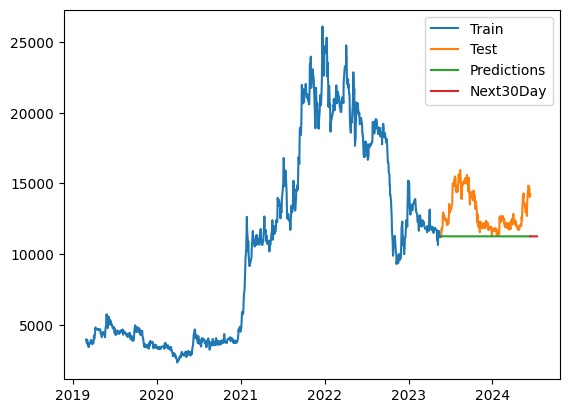

In [99]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [100]:
test_data.index

DatetimeIndex(['2023-05-24', '2023-05-25', '2023-05-26', '2023-05-29',
               '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02',
               '2023-06-05', '2023-06-06',
               ...
               '2024-05-31', '2024-06-03', '2024-06-04', '2024-06-05',
               '2024-06-06', '2024-06-07', '2024-06-10', '2024-06-11',
               '2024-06-12', '2024-06-13'],
              dtype='datetime64[ns]', name='time', length=265, freq=None)

In [101]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 2161.100784481141
Testing MAPE: 12.714429234868007
Testing MDA: 22.727272727272727
Testing MSLE: 0.028603839858890697


# Split data 9 : 1

In [102]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv('../SGT.csv')
data

,time,open,high,low,close,volume
0,3/1/2019,3980,3980,3960,3960,20
1,3/4/2019,3680,3960,3680,3720,400
2,3/5/2019,3930,3930,3930,3930,10
3,3/6/2019,3930,3930,3930,3930,150
4,3/7/2019,3790,3860,3790,3860,110
...,...,...,...,...,...,...
1317,6/7/2024,14800,14900,14600,14800,78100
1318,6/10/2024,14850,14850,14600,14600,39600
1319,6/11/2024,14550,14550,14000,14050,126200
1320,6/12/2024,14000,14200,13700,14200,83400


In [103]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [104]:
# 2. Đọc file dữ liệu chứng khoán FPT và chia train test validate theo tỉ lệ 9:1
df = data
df['time'] = pd.to_datetime(df['time'])
df = df[['close', 'time']]
df = df.dropna() # Drop missing values
df.set_index('time', inplace=True)
#df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
# Split the data into training and testing sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [105]:
pip install pmdarima

In [106]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17662.943, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17689.701, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17666.432, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17666.572, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17688.008, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17668.490, Time=3.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17664.847, Time=2.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=17664.138, Time=4.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=17664.342, Time=2.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17668.220, Time=0.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=17662.813, Time=1.60 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=17661.598, Time=0.72 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17667.824, Time=0.42 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=17663.440, Time=0.81 sec
 ARIMA(1,1,4)(0,0,0

ARIMA(order=(0, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [107]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(n_periods=len(y_test))

In [108]:
import datetime

In [109]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index = df.index[-1]
next_30_days = [last_index + datetime.timedelta(days=i+1) for i in range(30)]
last_data = pd.Index(next_30_days)
x_next_30_days =  np.array(next_30_days).reshape(-1, 1)
# Predict the closing prices for the next 30 days

y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[11792.42339774 11758.44994403 11795.20857556 11795.20857556
 11795.20857556 11795.20857556 11795.20857556 11795.20857556
 11795.20857556 11795.20857556 11795.20857556 11795.20857556
 11795.20857556 11795.20857556 11795.20857556 11795.20857556
 11795.20857556 11795.20857556 11795.20857556 11795.20857556
 11795.20857556 11795.20857556 11795.20857556 11795.20857556
 11795.20857556 11795.20857556 11795.20857556 11795.20857556
 11795.20857556 11795.20857556]


In [110]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 980.5736676479399


Testing RMSE: 980.5736676479399


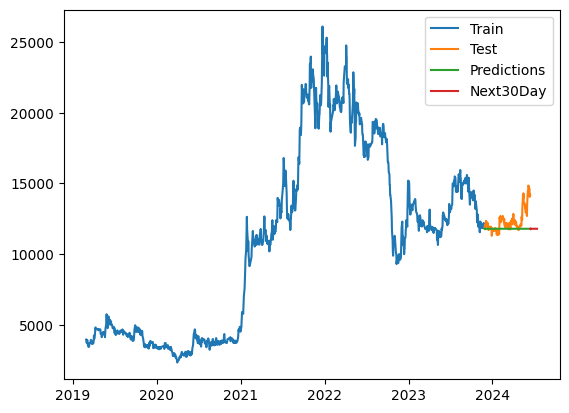

In [111]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [112]:
test_data.index

DatetimeIndex(['2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
               '2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
               '2023-12-08', '2023-12-11',
               ...
               '2024-05-31', '2024-06-03', '2024-06-04', '2024-06-05',
               '2024-06-06', '2024-06-07', '2024-06-10', '2024-06-11',
               '2024-06-12', '2024-06-13'],
              dtype='datetime64[ns]', name='time', length=133, freq=None)

In [113]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mda = calculate_mda(y_test, y_pred)

# Tính MSLE
test_msle = np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MDA:', test_mda)
print('Testing MSLE:', test_msle)

Testing RMSE: 980.5736676479399
Testing MAPE: 4.687761362995067
Testing MDA: 14.393939393939394
Testing MSLE: 0.005849893130561024
